<center>

## <font color='maroon'>Ariel Barnea</font>    
## <font color='maroon'>ASTR 20500</font>
## <font color='maroon'>Final Project: Measuring the Expansion of the Universe and the Hubble constant</font>
    
#### <font color='black'>distributed: Monday, November 8</font>
#### <font color='black'>due: Friday, December 10</font>

    
#### 100 points total (+ 15 extra-credit exercises will provided upon request)
</center>


<center>
<img width=500 src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/Abell_S740.jpg/1024px-Abell_S740.jpg"></img>

### <font color='blue'>General information</font>

In this project you will carry out statistical analysis of the brightest galaxies in the Universe to 1) demonstrate the Hubble law and that the Universe expands, - i.e. the more distant galaxies are receding faster from us than closer ones and 2) measure the Hubble constant that relates the recession velocity of galaxies and their distance and quantify measurement uncertainty using credible regions. 

The Hubble constant is the constant relating the apparent recession velocity of other galaxies from us, $v_{\rm rec}$, usually measured in km/s and distance between us and the galaxy, $d$, usually measured in Megaparsecs (millions of [parsecs](https://en.wikipedia.org/wiki/Parsec)):

$$v_{\rm rec}=H_0 d$$

The recession velocity of a galaxy is measured via the shift of wavelength of lines in galaxy's spectrum that arises due to the regular [Doppler effect](https://en.wikipedia.org/wiki/Doppler_effect), but affecting electromagnetic light waves rather than sound. 

The background on the discovery of the expansion of the Universe and measurements of the Hubble constant can be found in [this notebook](https://drive.google.com/file/d/1eQeBvPXwDqptPj3aAnyPvVOrCfVlYcRl/view?usp=sharing)
and [this PBS video](https://www.youtube.com/watch?v=72cM_E6bsOs). 
You can review these before you start this project. 

The Hubble constant, denoted $H_0$, is one of the fundamental parameters describing the global properties of our Universe. It has units of inverse time and the age of our Universe (the time since the "Big Bang") is proportional to $1/H_0$. 

In the last several years, the [Hubble constant has become a source of controversy](https://news.uchicago.edu/story/new-measure-hubble-constant-adds-mystery-about-universes-expansion-rate) as several teams measured values for it that are in significant tension with each other.

In this project you will use a somewhat unique approach to measuring Hubble constant that is based on the properties of the brightest and largest galaxies in the Universe, called Brightest Cluster Galaxies (or BCGs). Let's see if we can contribute something to this debate!

### <font color='blue'>Concepts you are learning/reinforcing </font>

* The principles of how expansion rate of the Universe is measured in observations. 


* Using <tt>astroquery</tt> package to query a database of the brightest cluster galaxies identified in the SDSS survey and Vizier service queries to get distances to several nearby BCG galaxies


* Applying Bayesian model inference in a practical application, including derivation of the credible regions for model parameters and plotting constraints as 1d and 2d posterior pdfs. 


* Using object-oriented features of Python 


* Using <tt>Pandas</tt> module to read tables of data. 

### <font color='blue'>The method</font>


The method is based on the idea of [Hoessel (1980)](https://ui.adsabs.harvard.edu/abs/1980ApJ...241..493H/abstract) and [Lauer and Postman (1992)](https://ui.adsabs.harvard.edu/abs/1992ApJ...400L..47L/abstract), who noted that the brightest galaxies in the Universe, located in the centers of massive clusters of galaxies, have logarithms of their intrinsic brightnesses that are described by the Gaussian pdf with a constant mean. 

Thus, if the overall mean luminosity can be calibrated for a few galaxies, the measurements of *apparent* brightnesses in conjunction with measurements of recession velocity, can be used to estimate $H_0$. 

This method of estimating the Hubble constant is not particularly precise on an object-by-object basis. However, given that we can many galaxies to characterize the scatter of BCG brightness around the mean and the overall intercept of the "*Hubble diagram*" relating apparent magnitude $m$ and the recession velocity. 

**Derivation of the relevant equation:**
The *apparent magnitude* for an astronomical object in a given filter is defined as 

$$m = -2.5\log_{10}\,f + {\rm const} = -2.5\log_{10}\frac{L}{4\pi d^2}+ {\rm const},$$

where $f$ is measured flux from the object in this filter, $L$ is object's intrinsic luminosity in that filter (energy emitted per unit time), $d$ is distance to the object, and const is a constant defining the magnitude system. 

The *absolute magnitude* $M$ of an object is defined as the apparent magnitude that the object would have if its distance from us was $d=10$ parsecs (this system was designed for stars, hence the 10 pc, which is a typical distance to nearby stars). 

$$m = -2.5\log_{10}\frac{L}{4\pi d^2}+ {\rm const} = -2.5\log_{10}\left[\frac{L}{4\pi (10\,{\rm pc})^2}\times \frac{(10\,{\rm pc})^2}{d^2}\right]+ {\rm const}$$

Thus, 

$$m = -2.5\log_{10}\frac{L}{4\pi (10\,{\rm pc})^2} + {\rm const} + 5\log_{10}\frac{d}{10\,{\rm pc}} = M + 5\log_{10}d - 5,$$

where $d$ is in parsecs and definition of the absolute magnitude is used to get the last expression. If $d$ is measured in Megaparsecs (Mpc), $1\,{\rm Mpc}=10^6$ pc, as is often the case, $d_{\rm pc}=10^{6}\, d_{\rm Mpc}$  and the expression becomes: 

$$m = M + 5\log_{10}d_{\rm Mpc} + 25.$$

The Hubble law states that recession velocity, $v_{\rm rec}=cz$ (where $c$ is speed of light in vacuum and $z$ is measured object's redshift) is proportional to object's distance: $cz = H_0d$ or $d = cz/H_0$. 

Assuming that BCGs have a constant average absolute magnitude $M_0$ and standard deviation of $\sigma_{M_0}$ and plugging this into the equation above we get: 

$$m = 5\log_{10}cz + M_0 - 5\log_{10}H_0 + 25=5\log_{10}cz + M_{H_0}.$$

$m$ and $z$ are measured in the SDSS observations for the BCG galaxies. We can thus infer the intercept $M_{H_0} = M_0 - 5\log_{10}H_0 + 25$ for a linear model for the relation $m$ as a function of $\log_{10}cz$ with the fixed slope of 5. 

**Using Bayesian approach to model the BCG data.**
In this project you will use Bayesian approach to infer parameter values. This approach requires defining a likelihood and prior pdfs. 

**Choosing the functional form for the $M$ distribution and likelihood:**
There are two aspects you should consider in doing this. First, as the plot of $m$ vs $\log_{10} z$ below shows, there is a significant scatter in the relation of $m_r$ and $z$. Only a small fraction of this scatter is due to uncertainties of the magnitudes $m$ and redshifts $z$. Most of it is due to the *intrinsic scatter* of absolute magnitudes of the BCG galaxies. Thus the distribution of $M$ needs to be taken into account by the model. This means that we should adopt a functional form for this pdf which will depend on parameters, such as the central value, $M_0$,  and width of the distribution. You need to examine the distribution of $m$ for BCGs within narrow intervals of $z$ to understand what functional form for the pdf is appropriate.  

In doing this, be careful about 1) outliers (these may need to be removed before you compare a given functional form to the distribution) and 2) the fact that SDSS survey only measured spectra (and thus redshifts $z$) for objects with the apparent magnitudes $m<\approx 17.77$, thus for $z>0.15$ where some BCGs are beyond this limit distribution of $m$ can be trusted only for $m<17.77$. 

Given the Hubble law, $cz=H_0d$, selecting galaxies within a narrow range of redshifts is equivalent to selecting them in a narrow range of distances. We can thus approximate st deviation of $M$ distribution by the st. deviation of $m$ for galaxies within a narrow range of redshifts ($\Delta z\approx 0.01-0.02$). After the sample is cleaned for the outliers, measure the mean $m_r$ and its standard deviation

**Constraining $H_0$:** the equations above show that we can constrain the combination  $M_0 - 5\log_{10}H_0 + 25$, but not $H_0$ directly. In this case one says that parameters $M_0$ and $H_0$ are "degenerate" given this data alonge. 

This "degeneracy" can be broken by using an independent data that constrains $M_0$, which can be obtained by estimating the average absolute magnitude of a number of nearby BCGs for which independent distance estimates exist. We will discuss these measurements below. 



**Bayesian expression for the posterior of the model parameters**:

$$p_{\rm posterior}(H_0, M_0\vert \vec{m}_r, \vec{\sigma}_{m_r}, \vec{z}) = \frac{1}{Z} L(\vec{m}_r, \vec{\sigma}_{m_r}, \vec{z}\vert H_0, M_0, ...)\, p_{H0}(M_0)p_{M_0}(H_0) $$

instead of maximizing $p_{\rm posterior}(H_0, M_0\vert \vec{m}_r, \vec{\sigma}_{m_r}, \vec{z})$ we are maximizing $\ln p_{\rm posterior}$. 

Instead of maximizing $\ln p_{\rm posterior}$, we are minimizing $-2\ln p_{\rm posterior}$. 

$$-2\ln p_{\rm posterior} = -2\ln \left[L(\vec{m}_r, \vec{\sigma}_{m_r}, \vec{z}\vert H_0, M_0, ...)\, p_{H0}(M_0)p_{M_0}(H_0)\right] = -2\ln L - 2\ln p_{H0} - 2\ln p_{M_0}$$


Given that there are either 2 model parameters, $H_0$, $M_0$, or 3 (if scatter is included as a model parameter, as in the extra-credit exercise), you can map the posterior on an evenly space grid of $H_0$, $M_0$, and scatter for minimization and plotting. 

### <font color='blue'>The data</font>


**The main SDSS BCG sample.** We will use the [Sloan Digital Sky Survey (SDSS)](https://drive.google.com/file/d/1UMsjvY18VUGh4Nol1ycYa7sm9zPb1KvG/view?usp=sharing) and a [catalog of the brightest cluster galaxies](https://home.fnal.gov/~jghao/gmbcg_sdss_catalog.html) derived from it ([Hao et al. 2010](https://ui.adsabs.harvard.edu/abs/2010ApJS..191..254H/abstract)). 

The code showing how to read the catalog using the Python [astroquery](https://astroquery.readthedocs.io/en/latest/#introduction) package - the package affiliated with <tt>astropy</tt> package, but which you may need to [install](https://astroquery.readthedocs.io/en/latest/).  We can provide the data file for you if there will be issues. 

**BCG sample with independently measured distances.** You will also use a dozen nearby BCG galaxies selected in the Virgo cluster and other relatively nearby clusters ([Lauer et al. 2014](https://ui.adsabs.harvard.edu/abs/2014ApJS..215...22K/abstract)), which is also available via Vizier query with <tt>J/ApJ/797/82/bcg</tt> key. 

We will use [a table of distance measurements](https://ned.ipac.caltech.edu/Library/Distances/) for galaxies compiled for the [NASA Extragalactic Database (NED)](http://ned.ipac.caltech.edu/) to estimate the mean distances to several nearby BCG galaxies among distance estimates that were made using different methods, all of which are independent of redshifts. The table has been reformatted slightly to make it readable correctly with Pandas. 

Distances to astronomical objects are usually difficult to measure. A number of methods have been developed for galaxies, some of which are more accurate than others. One of the methods is based on the Tully-Fisher correlation that we've been modelling with a linear model, which allows one to estimate galaxy luminosity from observation of its rotation velocity. Other good methods include [Surface Brightness Fluctuations (SBF) method](http://astrosun2.astro.cornell.edu/~masters/lisadistances/sbf.htm), which is based on the fact that brightness of elliptical galaxies and centers of spiral galaxies is dominated by luminous red giant stars. The counts of these stars obey Poisson pdf and this and the fact that there will be more giants per pixel for more distant galaxies is exploited in this method. 

### <font color='blue'>The main required steps </font>

In the analyses involved in this project you will use several methods that we discussed during the course. In addition, you will practice the use of classes to organize calculations. 

#### Part I 

* Select a sample of BCG galaxies within the redshift range $0.05<z\leq 0.15$. The lower end of this range is determined by relatively small volume covered at these redshifts in which some brightest BCGs may be missed and the upper end is where the spectroscopic selection of the SDSS starts to affect completeness of the BCG sample. 


* Examine distribution of the apparent $r$-band magnitudes (see above for the definition of magnitudes and their relation to distances) in the sample you select. 


* For distant galaxies redshift $z$ is a rough proxy for their distance, so selecting galaxies within a narrow range of redshifts, approximately selects galaxies at the same distance. Make scatter plots of color of galaxies $g-r=m_g-m_r$ vs apparent magnitude $m_r$ at different $z$ ranges and examine how distribution of galaxies in this plane evolves with change $z$.  Based on what you see, design an outlier removal procedure to clean the sample from misidentified galaxies. This procedure can be based on sigma clipping algorithm described in the extra-credit problem at the end of the hw05 notebook.  


* The relative differences between *apparent* magnitudes $m_r$ at a narrow range of redshifts are approximately the same as differences between their *absolute* magnitudes. After you remove outliers from the sample, examine distributions of $m_r$ for galaxies at different mean $z$ in the redshift intervals $dz\approx 0.01-0.02$ and measure the standard deviation of $m_r$ in these bins. The average st. deviation will be used as the scatter $\sigma_{M_0}$. 
Based on what you see give an argument for which model pdf is reasonable to use to model distribution of absolute magnitudes of BCGs. 

#### Part II 

* Once you develop a model pdf for the distribution of absolute magnitudes, you are ready to construct the expression for the likelihood function of data (redshifts of the BCG in the cleaned sample, $r$-band magnitudes $m_r$ and their uncertainties, $e_{m_r}$), given the model. The uncertainties in $z$ are very small and can be neglected without any effect on the results.
The model parameters should be $M_0$ and $H_0$. For simplicity we will assume that $\sigma_{M_0}$ is fixed at the value you estimate in the previous step. In general, it has to be included into the model as a parameter and this is what you can do for extra credit after you are done with the main exercise. The effect of fixing standard deviations on the $H_0$ constraint is quite small, so as a default we can fix it which makes the parameter space 2-dimensional, instead of 3-dimensional.  


* Choose the prior pdf for $H_0$ and $M_0$. Present arguments backing up your choices for the prior pdfs 


* Develop a class <tt>BCG_Analysis</tt> that can be initialized with vectors of $z$, $m_r$, and $e_{m_r}$, as well as values for mean $\bar{M}_0$ and $\sigma_{M_0}$ of your BCG sample (after removal of outliers) and methods for statistical analyses of the sample: the method computing natural log of the likelihood of the sample, given the model parameters, natural log of the prior pdfs for the model parameters, and natural log of the posterior pdf given by the sum of the log likelihood and log prior pdfs. Here, however, your linear model should have a fixed slope of 5, but include intercept, $M_{H_0}$, which will combine model parameters $H_0$ and $M_0$. 


* Develop a method for your class to determine the parameter values for which negative of the posterior pdf is minimized, using <tt>scipy.optimize.minimize</tt> (examples of how to do this will be provided to you). Determine the values of $M_0$ and $H_0$ minimizing the posterior pdf and test your results by overplotting the mean line and 2 additional lines showing $\pm \sigma_M$ from the mean over the scatter plot of $m_r$ vs $\log_{10}cz$ for your BCG sample. This will allow you to make sure that parameters are determined correctly.


* Develop a method for your class that evaluates posterior on a grid of values in the plane of $M_0$ and $H_0$, which then can be used to identify $1-$, $2-$ and $3-\sigma$ contours and plot the posterior as a color map with contours overplotted. Produce a plot of the posterior in the $M_0-H_0$ plane with the 3 contours overplotted. Comment on how the distribution looks like and why. 

#### Part III

* After you complete the step above, use the sample of nearby BCGs with independent estimates of distances to compute absolute magnitudes for these BCGs and  estimate $M_0$ and as the mean of these absolute values and its uncertainty using uncertainty of the mean equation. You can now add an additional, tighter prior on the parameter $M_0$ using this estimate and its uncertainty. Minimize the parameters $H_0$ and $M_0$ with this prior pdf for $M_0$ (retaining the same prior pdf for $H_0$ as before). Comment on whether results changed.  


* Develop a method for your class that uses the grid of posterior values computed by the method in the previous bullet to compute "*marginalized*" distribution of $H_0$ and plot these along with the $68\%$ and $95\%$ confidence regions shown by shaded regions (called "credible regions" in the Bayesian approach). Produce a plot of the distributions with the credible regions shown. You will find examples of how this is done for the linear model in notebooks 14 and 15 linked above. 


* Once you carried out the main analysis. Use different instances of your class to carry out similar analysis using different $z_{\rm min}$ and $z_{\rm max}$ choices for your BCG sample, as well as different estimates of $\bar{M}_0$ and $\sigma_{M_0}$ using different subsets of nearby BCGs with measured distances (for example using only BCGs brighter than 13.5, 13.0, 12.5). Discuss how sensitive your results are to these choices. 

### <font color='blue'>Additional explorations</font>

* (10 extra-credit points). Inherit your class into your new class and modify its methods to include all three model parameters, $M_0$, $H_0$, $\sigma_{M_0}$, so that the scatter of the BCG absolute magnitude model can be modelled self-consistently. You will need to discuss and argue for a particular sensible choice for the prior pdf for $\sigma_{M_0}$. Output values of $M_0$, $H_0$, $\sigma_{M_0}$ that minimize the posterior and map out posterior over the 3-dimensional parameter space. Sum up the values of the posterior pdf along $\sigma_{M_0}$ direction to construct a two-dimensional distribution in the plane of $M_0$-$H_0$ marginalized over $\sigma_{M_0}$. Compare it to the results obtained in the main project part where $\sigma_{M_0}$ was fixed. 


* (5 extra credit points) Compare your estimates to the estimates of the Hubble constant using other methods, using one of the comparison methods that will be discussed during the last week of this course. 

### <font color='blue'>General considerations</font>

This will be a somewhat open-ended, but guided project. You will have an opportunity to explore but we will ask any questions you have and will guide you through the necessary steps. 

In [224]:
import numpy as np
from matplotlib import pylab as plt

In [225]:
# the following line is for google colab. comment it out if you use this on your laptop and have installed astroquery package
!pip install astroquery
from astroquery.vizier import Vizier

vsearch = Vizier
# extract table from the Hao et al. (2010) BCG catalog
vsearch.ROW_LIMIT = -1 # select all rows, not just default 50 first rows
vsearch.columns=["*", "e_rmag", "objid"] # select default columbs and objid column
catalog = vsearch.get_catalogs('J/ApJS/191/254/gmbcgdr7')

In [226]:
z = np.array(catalog[0]['zsp'], dtype='float')
mrbcg = np.array(catalog[0]['rmag'], dtype='float')
objid = np.array(catalog[0]['objid'], dtype='int64')
ra = np.array(catalog[0]['RAJ2000'], dtype='float')
dec = np.array(catalog[0]['DEJ2000'], dtype='float')
gr = np.array(catalog[0]['g-r'], dtype='float')
isel = (0.05 < z) & (z <= 0.15)
objids = objid[isel]
ras = ra[isel]
decs = dec[isel]
zs = z[isel]
mrs = mrbcg[isel]
grs = gr[isel]
zs = np.array(zs)
mrbs = np.array(mrs)
grs = np.array(grs)

In [227]:
'''
#You can also get the catalog like this from the copy I saved:

import pandas 
import numpy as np

url = 'http://astro.uchicago.edu/~andrey/classes/a205/data/bcg_catalog.csv'
catalog = pandas.read_csv(url)

# then we can retrieve the information needed for this project like this
z = np.array(catalog['zsp'], dtype='float') # spectroscopic redshift
mr = np.array(catalog['rmag'], dtype='float') # r-band magnitude
emr = np.array(catalog['e_rmag'], dtype='float') # uncertanty of r-band magnitude
gr = np.array(catalog['g-r'], dtype='float') # g-r color 
objid = np.array(catalog['objid'], dtype='int64') # SDSS unique object id
ra = np.array(catalog['RAJ2000'], dtype='float') # right ascension of the object
dec = np.array(catalog['DEJ2000'], dtype='float') # declination of the object
'''

"\n#You can also get the catalog like this from the copy I saved:\n\nimport pandas \nimport numpy as np\n\nurl = 'http://astro.uchicago.edu/~andrey/classes/a205/data/bcg_catalog.csv'\ncatalog = pandas.read_csv(url)\n\n# then we can retrieve the information needed for this project like this\nz = np.array(catalog['zsp'], dtype='float') # spectroscopic redshift\nmr = np.array(catalog['rmag'], dtype='float') # r-band magnitude\nemr = np.array(catalog['e_rmag'], dtype='float') # uncertanty of r-band magnitude\ngr = np.array(catalog['g-r'], dtype='float') # g-r color \nobjid = np.array(catalog['objid'], dtype='int64') # SDSS unique object id\nra = np.array(catalog['RAJ2000'], dtype='float') # right ascension of the object\ndec = np.array(catalog['DEJ2000'], dtype='float') # declination of the object\n"

Let's begin with creating a Numpy array of redshifts $z$ in the range of $0.05\leq z\leq 0.15$, correlating to an array of galaxies that are constrained to a relatively small distance of one another, by the definition of being within a redshift range of $\Delta z \approx 0.10$. But hey guess what, this has already been done for us:

In [228]:
for i in range(0,np.size(zs)):
  if zs[i] <= 0.05 or zs[i] >= 0.15:
    check = "ZS has not been parsed"
  else:
    check = "ZS has been parsed :D"
print(check)

ZS has been parsed :D


Now let's take a look at the distributions of our data.

In [229]:
def find_min(sample):
  min = np.max(sample)
  for val in sample:
    if val == 0 or min < val:
      continue
    else:
      min = val
  return min

In [230]:
from scipy import stats

def compute_stats(input, name):
  iqr = stats.iqr(input)
  print(name + ":\nMean:",input.mean(),"\nMedian:", np.median(input),"\nStDev:",input.std(),"\nMin:",input[input>0].min(),"\nMax:",input.max(),"\nIQR:",iqr,"\n")

In [231]:
compute_stats(zs,"BCG 'z' Sample")
compute_stats(mrs,"m_r Sample")
compute_stats(grs,"'g-r' Sample")

BCG 'z' Sample:
Mean: 0.12247423293172692 
Median: 0.12634 
StDev: 0.020106701865637098 
Min: 0.05217 
Max: 0.14991 
IQR: 0.029079999999999995 

m_r Sample:
Mean: 16.073928508988345 
Median: 16.06999969482422 
StDev: 0.6691823468554255 
Min: 13.998000144958496 
Max: 19.371000289916992 
IQR: 0.8629999160766602 

'g-r' Sample:
Mean: 1.0434899607815418 
Median: 1.0470000505447388 
StDev: 0.09710360858922769 
Min: 0.5440000295639038 
Max: 1.8600000143051147 
IQR: 0.09800004959106445 



In [232]:
def plot(sample, title):
  plt.figure(figsize=(6,6)) # define figure and its size
  plt.xlabel('x') # x-axis label
  plt.ylabel('Density of Samples') # y-axis label
  plt.hist(sample, density=True, color='slateblue', alpha=1., bins='auto') # produce histogram of grs values 
  plt.title(title)
  plt.show() # show the entire plot

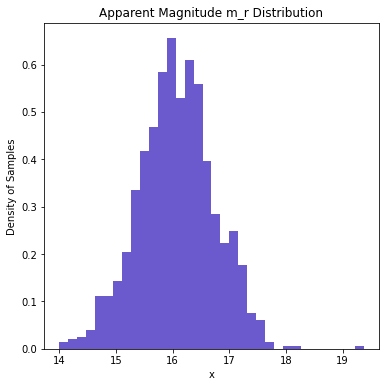

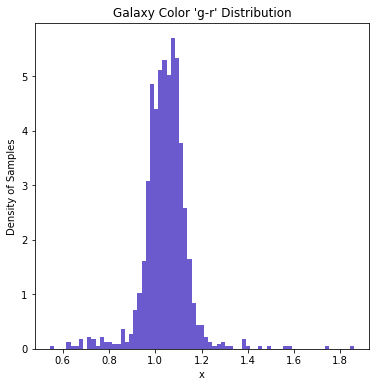

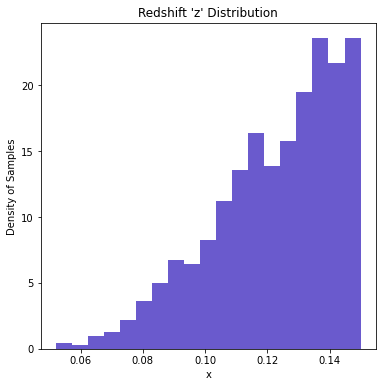

In [233]:
plot(mrs, "Apparent Magnitude m_r Distribution")
plot(grs, "Galaxy Color 'g-r' Distribution")
plot(zs, "Redshift 'z' Distribution")

Let's now make scatter plots of color of galaxies $g-r=m_g-m_r$ vs. apparent magnitude $m_r$ at different redshift $z$ ranges and examine how the distribution of galaxies in this plane changes with $z$. We can do this using Matplotlib, as usual.

In [234]:
def plot_xy(x, y, figsize=(6,6), xlim = [2, 5], ylim = [2, 5],
           xlabel='x', ylabel='y', title='title'):
    plt.figure(figsize = figsize) # define figure and its dimensions
    plt.xlabel(xlabel); plt.ylabel(ylabel) # x and y axes labels
    plt.xlim(xlim); plt.ylim(ylim)
    plt.scatter(x, y, marker = '.', s = 2, c = 'darkslateblue')
    plt.grid(ls = 'dotted')
    plt.title(title)
    plt.show()

In [235]:
print(mrs.min(),mrs.max())

13.998000144958496 19.371000289916992


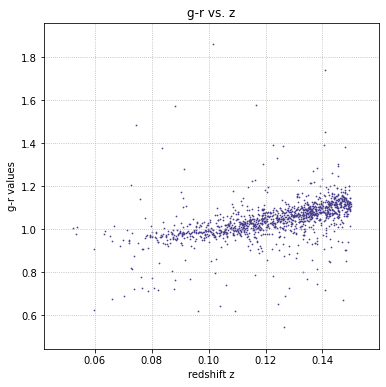

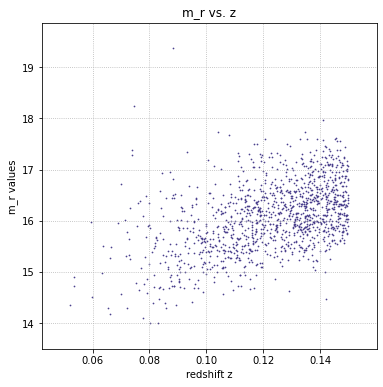

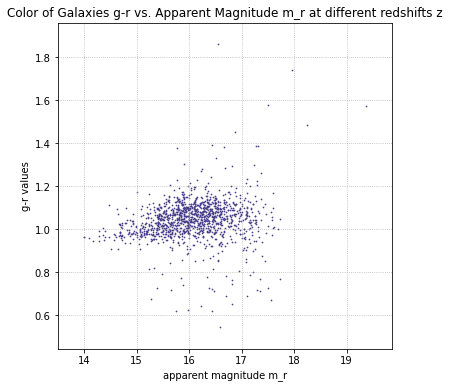

In [236]:
plot_xy(zs, grs, xlim=[zs.min()-0.01,zs.max()+0.01], ylim=[grs.min()-0.1, grs.max()+0.1], 
        xlabel='redshift z', ylabel='g-r values', title='g-r vs. z')
plot_xy(zs, mrs, xlim=[zs.min()-.01,zs.max()+.01], ylim=[mrs.min()-0.5, mrs.max()+0.5], 
        xlabel='redshift z', ylabel='m_r values', title='m_r vs. z')
plot_xy(mrs, grs, xlim=[mrs.min()-0.5, mrs.max()+0.5], ylim=[grs.min()-0.1, grs.max()+0.1], 
        xlabel='apparent magnitude m_r', ylabel='g-r values', title='Color of Galaxies g-r vs. Apparent Magnitude m_r at different redshifts z')

Now let's go about designing an outlier removal procedure to clean the sample from misidentified galaxies. We'll use the IQR test, which basically establishes to "outlier fences" based on the interquartile range of our data set, for which any values within our data set outside of this range will be considered an outlier. Outliers are considered to be any values $x\in S$ where $S$ is out set such that $x\leq\mathrm{Q1}-1.5(\mathrm{IRQ})$ and $x\geq\mathrm{Q3}+1.5(\mathrm{IQR})$. Since our plotxy function requires $x$ and $y$ datasets of the same size, let's apply this IQR test to our apparent magnitude $m_r$ and galaxy color $g-r$ data sets and plug in the boolean value of "False" for any values outside of the outlier fence, to ensure they remain the same size.

In [237]:
def iqr_fence(sample):
  iqr = stats.iqr(sample)
  q1 = np.percentile(sample, 25)
  q3 = np.percentile(sample, 75)

  out1 = q1 - 1.5*iqr
  out2 = q3 + 1.5*iqr

  # sample_inrange = (sample > sample_out1) & (sample < sample_out2)

  sample_new = []

  for val in sample:
    if val > out1 and val < out2:
      sample_new.append(val)
    else:
      sample_new.append(False)

  return np.array(sample_new)

Let's now examine the distributions of $m_r$ and $g-r$ for different redshift intervals $z-dz\leq z\leq z+dz$, where $dz\approx 0.01$. Above, we observed the shifting mean for each interval, so we need to account for that, which we will do below:

In [238]:
def clean_samples(z_intervals, zs, mrs, grs):
  interval = []
  mr_new = []
  gr_new = []
  z_new = []
  mr_std = []

  dz = 0.01

  for zv in z_intervals:
    interval = (zv-dz <= zs) & (zs < zv+dz)
    gr_temp = iqr_fence(grs[interval])
    mr_temp = iqr_fence(mrs[interval])
    z_temp = zs[interval]
    mr_std.append(np.std(mr_temp[mr_temp>0], ddof=1))
    for grt in gr_temp: gr_new.append(grt)
    for mrt in mr_temp: mr_new.append(mrt)
    for zt in z_temp: z_new.append(zt)

  mr_new = np.array(mr_new)
  gr_new = np.array(gr_new)
  z_new = np.array(z_new)

  mr_filter = mr_new
  gr_filter = gr_new
  z_filter = z_new

  mr_new = mr_new[(mr_filter>0) & (gr_filter>0)]
  gr_new = gr_new[(mr_filter>0) & (gr_filter>0)]
  z_new = z_new[(mr_filter>0) & (gr_filter>0)]

  mr_std = np.array(mr_std)

  sig_m0 = mr_std.mean()

  return z_new, mr_new, gr_new, sig_m0

In [239]:
z_intervals = np.arange(0.06, 0.14, 0.02) # intervals of z-dz <= z < z+dz covers the missing z_intervals (0.06, 0.08, 0.10, ...)
z_new, mr_new, gr_new, sig_m0 = clean_samples(z_intervals, zs, mrs, grs)

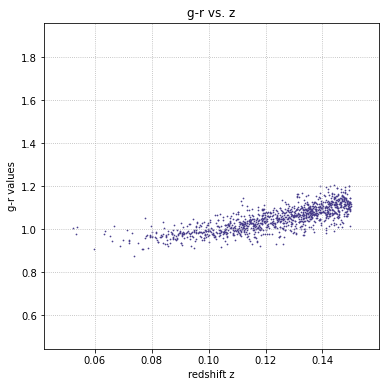

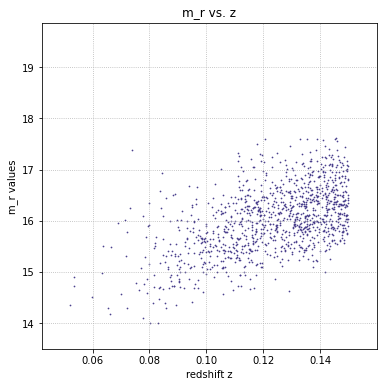

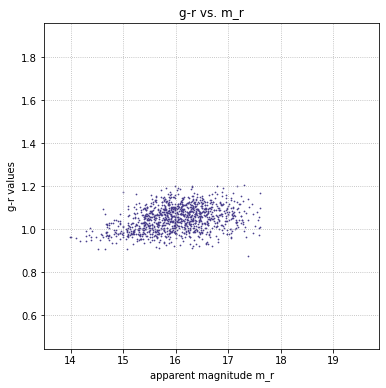

In [240]:
plot_xy(z_new, gr_new, xlim=[zs.min()-0.01,zs.max()+0.01], ylim=[grs.min()-0.1, grs.max()+0.1], 
        xlabel='redshift z', ylabel='g-r values', title='g-r vs. z')
plot_xy(z_new, mr_new, xlim=[zs.min()-0.01,zs.max()+0.01], ylim=[mrs.min()-0.5, mrs.max()+0.5], 
        xlabel='redshift z', ylabel='m_r values', title='m_r vs. z')
plot_xy(mr_new, gr_new, xlim=[mrs.min()-0.5, mrs.max()+0.5], ylim=[grs.min()-0.1, grs.max()+0.1], 
        xlabel='apparent magnitude m_r', ylabel='g-r values', title='g-r vs. m_r')

And we got nice clean data! Let's also graph our new snipped data set on a new scale that allows us to get a better look at the distribution of the data.

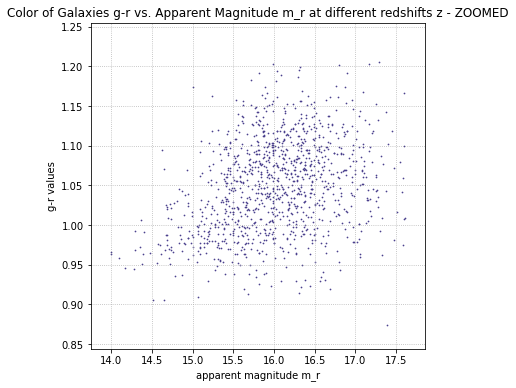

In [241]:
plot_xy(mr_new, gr_new, xlim=[mr_new[mr_new>0].min()-0.25, mr_new[mr_new>0].max()+0.25], ylim=[gr_new[gr_new>0].min()-0.03, gr_new[gr_new>0].max()+0.05], 
        xlabel='apparent magnitude m_r', ylabel='g-r values', title='Color of Galaxies g-r vs. Apparent Magnitude m_r at different redshifts z - ZOOMED')

We calculated the scatter $\sigma_{M_0}$ by finding the mean standard deviation of each of our redshift intervals $z-dz\leq z\leq z+dz$, where $dz\approx 0.01$, where the standard deviations were appended to our nparray denoted $\texttt{mr_std}$.

To determine which model pdf is reasonable to use to model the distribution of the absolute magnitudes of the BCGs, let's histogram our data and see how it looks.

In [242]:
from math import e, pi

def gaussian_pdf(x, mu=0., sigma=1.):
    """
    returns value of the Gaussian pdf with input mu, sigma for input x 

    Parameters:
    -----------
    x:     a float or a 1d numpy array of floats, input x value(s)
    mu:    a float, mean of the Gaussian (default 0)
    sigma: a float, st. deviation of the Gaussian (default 1.0)
    
    Returns:
    --------
    
    g(x): a float - value of the Gaussian pdf for input x value(s)
    """
    assert(sigma !=0.)

    return 1./(2.*pi)**0.5/sigma * e**(-0.5*((x-mu)/sigma)**2)

def gauss_line(xmin, xmax, dx=0.01, mu=0., sigma=1.):
    '''
    construct lists of x values and corresponding Gaussian pdf values with specified mu and st dev sigma
    
    Returns:
    xp, pgauss - lists of floats containing x values in the range [xmin,xmax] and pdf values p_Gauss(x)
    '''
    pgauss = []
    xp = []
    x = xmin # start at the minimum
    dx = dx * (xmax - xmin) # increase x with step dx

    while x <= xmax: 
        pgauss.append(gaussian_pdf(x, mu=mu, sigma=sigma))
        xp.append(x)
        x = x + dx
        
    return xp, pgauss

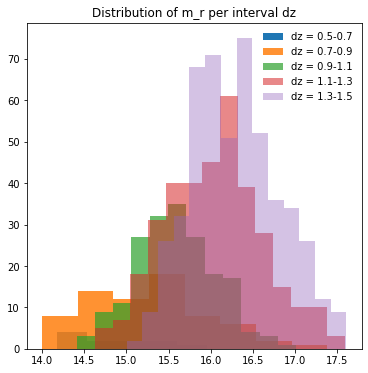

In [243]:
alpha = 1.
fig = plt.figure(figsize=(6,6))

dz = 0.01
z_intervals = np.arange(0.06, 0.14, 0.02)

label = ['0.5-0.7', '0.7-0.9', '0.9-1.1', '1.1-1.3', '1.3-1.5']

for j, zv in enumerate(z_intervals):
  mr_plot = mr_new[(zv-dz <= z_new) & (z_new < zv+dz)]
  plt.hist(mr_plot, alpha=alpha, label='dz = {:s}'.format(label[j]), bins='auto')
  # xp, pgauss = gauss_line(mr_plot.min(), mr_plot.max(), mu=mr_plot.mean(), sigma=mr_plot.std())
  # plt.plot(xp, pgauss, c='m', lw=2., label='Gaussian PDF')
  alpha -= 0.15

plt.legend(loc='best', frameon=False)
plt.title('Distribution of m_r per interval dz')
plt.show()

Observe that the distributions take the form of a Gaussian PDF. We can also directly observe this from the scatter plots, whereby there are more concentrated points around the center of the distributions and less/more scattered points towards the edges.

Now we need to go about constructing an expression for the likelihood pdf $p(m_r\vert z, M_0, H_0, \sigma_{M_0})$ given our model. Note that the uncertainty of our redshifts $z$ is small and beyond the scope of this project so we will pretend that $z$ has no uncertainty and assume that the vector of $z$'s can simply be considered as exact values. Thus, we write the likelihood pdf as written to represent that we are not modelling the pdf for the $z$-measurements. It can be written as the sum of a bunch of Gaussian PDFs as follows:

$$p(m_r\vert z, M_0, H_0, \sigma_{M_0}) = \frac{1}{\sqrt{2\pi\sigma^2_{M_0,0}}}\rm{exp}\left[-\frac12\frac{\bigl(m_{r,0}-\overline{m_{r,0}}\bigr)^2}{\sigma^2_{M_0}}\right]\times\cdots\times\frac{1}{\sqrt{2\pi\sigma^2_{M_0,n-1}}}\rm{exp}\left[-\frac12\frac{\bigl(m_{r,n-1}-\overline{m_{r,0}}\bigr)^2}{\sigma^2_{M_0,n-1}}\right]$$

Which can be rewritten as follows (without the normalization constant):

$$\ln p(m_r\vert z, M_0, H_0, \sigma_{M_0})=-\sum_{i=0}^{n-1}\ln\sigma_{M_0,i}-\frac12\sum_{i=0}^{n-1}\left(\frac{m_r-m}{\sigma_{M_0,r}}\right)^2$$

where we utilize a linear model for the relation $m$ as a function of $\log_{10}{cz}$ with the following equation:

$$m=5\log_{10}{cz}+M_{H_0}$$

where the intercept is

$$M_{H_0}=M_0-5\log_{10}{H_0}+25$$

with a fixed slope of $5$.

With all of this, let's make our $\texttt{BCG Analysis class}$ with our $\texttt{log_likelihood}$, $\texttt{log_prior}$, and $\texttt{log_posterior methods}$, as well as the $\texttt{minus_log_posterior}$ and $\texttt{param_val}$ methods which, using the $\texttt{scipy.optimize.minimize}$ function, will allow us to find the values for $H_0$ and $M_0$ that we are looking for.

In [244]:
from scipy.optimize import minimize

class BCGAnalysis:

  def __init__(self, z, mr, m0, sig_m0):
    self.z = z
    self.mr = mr
    self.m0 = m0
    self.sig_m0 = sig_m0

  def log_likelihood(self, params, *args):
    h0, m0 = params
    z, mr, sig_m0 = args
    c = 2.998e5
    
    loglike = -np.sum(np.log(sig_m0) + 0.5*((mr - (5*np.log10(c*z) + m0 - 5*np.log10(h0) + 25))/sig_m0)**2)
                      
    return loglike

  def log_prior(self, params): 
  
    h0, m0 = params  # params is a list of 2 values with parameter values for H0 and M0

    h0min, h0max = 30, 100
    m0min, m0max = -25, -17

    if (h0 >= h0min) and (h0 <= h0max): 
        priorh0 = np.log(1/(h0max - h0min))
    else:
        priorh0 = -1000

    if (m0 >= m0min) and (m0 <= m0max): 
        priorm0 = np.log(1/(m0max - m0min))
    else:
        priorm0 = -1000

    return priorh0 + priorm0 # log of the product of prior pdfs is the sum of the logs of these pdfs 

  def log_posterior(self, params, *args):
    return self.log_likelihood(params, *args) + self.log_prior(params)
  
  def minus_log_posterior(self, params, *args):
    return -self.log_posterior(params, *args)
  
  def param_val(self, params, *args):
    p0 = [70, -21] # initial guesses for parameter values
    z, mr, sig_m0 = args

    res = minimize(self.minus_log_posterior, p0, args=(z, mr, sig_m0), 
               method='nelder-mead', tol=1.e-9)
    h0, m0 = res.x

    print('H0 = {:>.4g};  M0 = {:>.4g}'.format(h0, m0))
    return h0, m0
  
  def posterior_grid(self, params, *args):

    h0, m0 = params
    z, mr, sig_m0 = args

    nh0g, nm0g = 300, 300 # define the number of grid points in h0 and m0
    h0min, h0max = h0-15., h0+15.
    m0min, m0max = m0-2.5, m0+2.5 

    h0g = np.linspace(h0min, h0max, nh0g)
    m0g = np.linspace(m0min, m0max, nm0g)

    pgrid = np.zeros((nh0g,nm0g)) # initialize 2D array to hold 2d grid of posterior pdf values
    # cycle through every grid point and compute and record ln(posterior pdf) 
    for i, h0d in enumerate(h0g):
        for j, m0d in enumerate(m0g):
          pgrid[i,j] = self.log_posterior([h0d, m0d], *args)

    pgrid = np.exp(pgrid) # convert ln(posterior) to posterior; e^ln x = x 
    norm_factor = np.sum(pgrid) # total probability within the range of the grid
    pgrid = np.maximum(1.e-300, pgrid / norm_factor) # normalize posterior so it sums up to 1

    return pgrid, h0g, m0g

In [245]:
m0i = np.mean(mr_new)
h0i = 70
params_i = [h0i, m0i]

bcg1 = BCGAnalysis(z_new, mr_new, m0i , sig_m0)

h0, m0 = bcg1.param_val(params_i, z_new, mr_new, sig_m0)

params = [h0, m0]

pgrid, h0g, m0g = bcg1.posterior_grid(params, z_new, mr_new, sig_m0)

H0 = 74.86;  M0 = -22.41


Let's now make a scatter plot of our $m_r$ data against $\texttt{log(cz)}$ and throw in our newly computed standard deviations in the form of $\sigma_{M_0}$. 

In [246]:
def noshow_plot_xy(x, y, figsize=(6,6), xlim = [2, 5], ylim = [2, 5],
           xlabel='x', ylabel='y', title='title'):
    plt.figure(figsize = figsize) # define figure and its dimensions
    plt.xlabel(xlabel); plt.ylabel(ylabel) # x and y axes labels
    plt.xlim(xlim); plt.ylim(ylim)
    plt.scatter(x, y, marker = '.', s = 2, c = 'darkslateblue')
    plt.grid(ls = 'dotted')
    plt.title(title)

In [247]:
def plotlog(z_new, mr_new, h0, m0):
  c = 2.998e5

  logcz = np.log10(c*z_new)

  noshow_plot_xy(logcz, mr_new, xlim=[logcz.min()-.05, logcz.max()+.05], ylim=[mr_new[mr_new>0].min()-0.5, mr_new[mr_new>0].max()+0.5], xlabel='log_10(cz)', ylabel='mr', title='m_r vs. log_10(cz)')

  mr_fit = 5*logcz + m0 - 5*np.log10(h0) + 25
  plt.plot(logcz, mr_fit, c='m')
  plt.plot(logcz, mr_fit + sig_m0, c='g')
  plt.plot(logcz, mr_fit - sig_m0, c='g')

  plt.show()

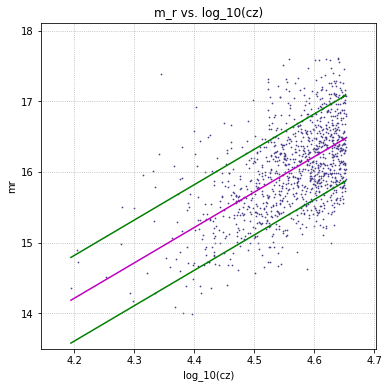

In [248]:
plotlog(z_new, mr_new, h0, m0)

As we can see, our r-band magnitude mean line, colored pink, runs right through the center of the data, with our average standard deviation (scatter) lines, colored green, running evenly on either side of the mean line and covering about 68% of the data, which aligns with what we'd expect from $\pm 1\sigma_M$ away from the mean.

Let's now focus on finding our credible regions and making our colored contour plot.

In [249]:
def get_xpfrac(x, pcum, pfrac):
    '''
    Given an numpy array x and corresponding cumulative probability for each element P(<x)
    give the value of x element that corresponds to a given value of P(<x) = pfrac
    
    Returns: 
    
        value of x corresponding to P(<x) = pfrac
    '''
    inds = (pcum < pfrac)
    xd = x[inds]
    return xd[-1]

def grid_stats(pgrid, xg, yg, axis=0, argname='b'):
    '''
    Compute statistics given the grid of pdf values for two parameter grids xg, yg
    
    The code below uses numpy operations to find the grid cell with the largest pdf value
    (which corresponds to "best fit" parameter values)
    
    '''
    # marginalize probability along input axis
    pmarg = np.sum(pgrid, axis=axis) # total probability along one axis
    # index where maximum probability is within a column or row of pgrid
    imax = np.argwhere(pmarg==pmarg.max())[0][0]
    if axis: pg = xg 
    else: pg = yg
    # cumulative probability distribution along axis 
    pcum = np.cumsum(pmarg) / np.sum(pmarg)
    
    pmax = pg[imax] # maximum pdf value
    # get values of pg where P(<pg) = to the last argument
    p025, p975 = get_xpfrac(pg, pcum, 0.025), get_xpfrac(pg, pcum, 0.975)
    p341, p657 = get_xpfrac(pg, pcum, 0.1573), get_xpfrac(pg, pcum,0.8427)

    print('max. probability at {} = {:.4g}'.format(argname, pmax))
    print('68.27% credible region for {}: {:.4g} - {:.4g}'.format(argname, p341, p657))
    print('95% credible region for {}: {:.4g} - {:.4g}'.format(argname, p025, p975))
    return pmax, p341, p657, p025, p975

In [250]:
h0max, h0l68min, h0l68max, h0l95min, h0l95max = grid_stats(pgrid, h0g, m0g, axis=1, argname='h0')
m0max, m0l68min, m0l68max, m0l95min, m0l95max = grid_stats(pgrid, h0g, m0g, axis=0, argname='m0')

max. probability at h0 = 76.32
68.27% credible region for h0: 64.48 - 85.05
95% credible region for h0: 60.46 - 89.06
max. probability at m0 = -22.07
68.27% credible region for m0: -22.76 - -22.15
95% credible region for m0: -22.89 - -22.05


In [251]:
def plot_posteriors(pgrid, h0g, m0g, figsize=(10,5)):
    '''
    Plot marginalized posterior pdfs of the slope b and intercept c
    
    pgrid is a 2d grid of posterior pdf values evaluated for evenly spaced grid
    of b and c, which is contained in the bg and cg numpy 1d arrays
    
    Computes 68.27 and 95% credible regions for marginalized posteriors and plots them
    as shaded regions along with the posterior pdf itself (line)
    '''
    
    h0marg = np.sum(pgrid, axis=1) # marginalize over h0
    m0marg = np.sum(pgrid, axis=0) # marginalize over m0
    
    # get credible regions for 2d grid for these marginalized distributions
    h0max, h0l68min, h0l68max, h0l95min, h0l95max = grid_stats(pgrid, h0g, m0g, axis=1, 
                                                              argname='h0')
    m0max, m0l68min, m0l68max, m0l95min, m0l95max = grid_stats(pgrid, h0g, m0g, axis=0, 
                                                              argname='m0')
    # plot "marginalized" likelihoods for slope b and intercept c
    fig_kw={'figsize': figsize}
    # multipanel figure with 1 row and 2 panels
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex='col', sharey='row', **fig_kw)
    # first plot slope h0 posterior
    ax[0].set_xlabel('slope h0')
    ax[0].set_ylabel('posterior pdf')
    # find elements of h0 that are within credible region
    i95 = (h0g > h0l95min) & (h0g<=h0l95max)
    ax[0].fill_between(h0g[i95], h0marg[i95], color='slateblue', alpha=0.5, label='95% cl')
    i68 = (h0g > h0l68min) & (h0g<=h0l68max)
    ax[0].fill_between(h0g[i68], h0marg[i68], color='slateblue', alpha=0.75, label='68.27% cl')
    ax[0].plot(h0g, h0marg, c='darkslateblue', lw=3)
    ax[0].legend(loc='upper left', fontsize=12)
    ax[0].grid(ls=':', c='gray')
    # now plot intercept m0 posterior
    ax[1].set_xlabel('intercept m0')
    i95 = (m0g > m0l95min) & (m0g<=m0l95max)
    ax[1].fill_between(m0g[i95], m0marg[i95], color='slateblue', alpha=0.5)
    i68 = (m0g > m0l68min) & (m0g<=m0l68max)
    ax[1].fill_between(m0g[i68], m0marg[i68], color='slateblue', alpha=0.75)
    ax[1].plot(m0g, m0marg, c='darkslateblue', lw=3)
    ax[1].grid(ls=':', c='gray')
    plt.show()

max. probability at h0 = 76.32
68.27% credible region for h0: 64.48 - 85.05
95% credible region for h0: 60.46 - 89.06
max. probability at m0 = -22.07
68.27% credible region for m0: -22.76 - -22.15
95% credible region for m0: -22.89 - -22.05


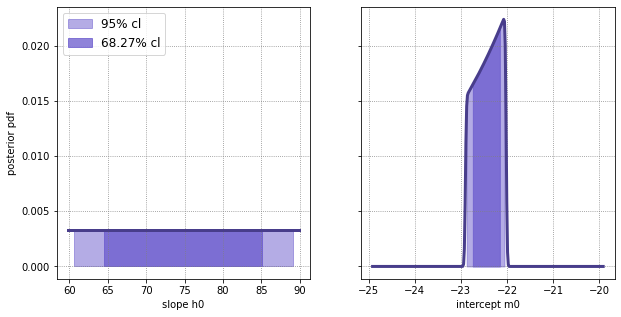

In [252]:
plot_posteriors(pgrid, h0g, m0g)

We can see that the slope h0 graph above is just a horizontal line spanning across the possible ranges of $H_0$, which the credible regions doing their job properly and giving us ranges for $H_0$ which make sense. Then our intercept m0 graph is even more strange, with a weird spike in the middle and a short and rapid increase in the y-axis across this spike. Once again though, we see that the credible regions are doing their job and giving us ranges for $M_0$ that makes sense. These plots are definitely interesting, and we can attribute them to the unconstrained values of $M_0$ and $H_0$. Since we don't constrain what $M_0$ can be, then we find that there are many different linear combinations of $M_0$ and $H_0$ that can give us the correct value, particularly since we are working with $M_{H_0}$, which is a combined parameter. Thus, in order to get more realistic graphs, we need to constrain $M_0$ (which we will do in the upcoming part), that way we can constrain what $H_0$ actually is, instead of having arbitrary and possibly trivial linear combinations.

In [253]:
from scipy.optimize import brentq

def conf_interval(x, pdf, conf_level):
    """
    helper function for numerical solution of the confidence level
    fine x value in the pdf array that corresponds to contour enclosing
    the fraction of total probability corresponding to conf_level
    """
    return np.sum(pdf[pdf > x])-conf_level

# define confidence levels - the fractions of total probability for which we want
# to define contours 
conflevs = [0.6827, 0.9545, 0.9973]
levs = []

for m0l in conflevs:      
    sig = brentq(conf_interval, 0., 1., args=(pgrid, m0l) )   
    levs.append(sig)


In [254]:
from matplotlib import cm

def plot_color_map(x, y, data, xlim=[0.,1], ylim=[0.,1.], 
                   xlabel = ' ', ylabel = ' ', cmap='winter', colorbar=None, 
                   levels = [], contcmap = 'Reds',
                   plot_title=None, figsize=3.0, figsave=None):
    '''
    Generic helper function for plotting values in 2d array data gridded at evenly 
    spaced x and y values passed in the vectors in the first 2 arguments. 
    The other arguments control plotting with matplotlib
    '''
    
    fig, ax = plt.subplots(figsize=(figsize,figsize))
    ax.axis([xlim[0], xlim[1], ylim[0], ylim[1]])

    plt.xlabel(xlabel); plt.ylabel(ylabel)
    cmap = cm.get_cmap(cmap)
    im = ax.pcolormesh(x, y, data, cmap=cmap, shading='auto', rasterized=False)
    if levels:
        ax.contour(x, y, data, levels=levels, cmap=contcmap)
    if colorbar: 
        fig.colorbar(im, ax=ax)
    if plot_title:
        plt.title(plot_title, fontsize=3.*figsize)

    if figsave:
        plt.savefig(figsave, bbox_inches='tight')
    plt.show()

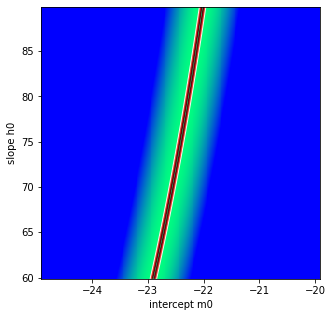

In [255]:
# plot ln(Likelihood) and 1-, 2-, and 3-sigma 2d contours
plot_color_map(m0g, h0g, np.log(pgrid), ylabel='slope h0', xlabel='intercept m0',
               ylim=[np.min(h0g), np.max(h0g)], xlim=[np.min(m0g), np.max(m0g)], levels = sorted(np.log(levs)), figsize=5) 

Which we did successfully! Let's now move onto constraining our parameters using a BCG sample with independently measured distances.

### BCG sample with independently measured distances. 

In [256]:
# these arrays contain names of a couple dozen nearby BCGs that are within SDSS catalog; 
names_bcgs = np.array(['NGC 7649', 'NGC 7647', 'NGC 7578B', 'NGC 6166', 'NGC 6173', 'NGC 3842', 'IC 0712', 'IC 2738', 'NGC 3550 NED01', 'NGC 3551', 'UGC 05515', 'UGC 04289', 'UGC 00797','UGC 00579', 'NGC 6086', 'NGC 2832', 'NGC 6041A', 'CGCG 077-097', 'NGC 4886', 'NGC 4874', 'CGCG 156-042', 'MESSIER 049', 'MESSIER 087'])

# this array contains r-band model apparent magnitudes of these BCG galaxies from the SDSS galaxy catalog
# when average distance modulus mu can be estimated using NED distance measurements table below, absolute r-band magnitude for these can be estimated as Mr = mr - mu
mr_bcgs = np.array([13.273, 13.28, 13.74, 13.0, 12.340, 12.25, 13.185, 13.79, 13.55, 13.18, 13.119, 13.051, 13.579, 13.149, 12.941, 12.046, 13.49, 13.25, 11.975, 12.102, 13.766, 8.31, 8.61])


In [257]:
import pandas # pandas is a module for reading Excel formatted data and more

nedd_url = 'http://astro.uchicago.edu/~andrey/classes/a205/data/NED30.5.1-D-17.1.2-20200415.csv'
nedd = pandas.read_csv(nedd_url)

In [258]:
nedd[:3]

,Exclusion Code,D,Galaxy ID,m-M,err,D (Mpc),Method,Reference,REFCODE,Unnamed: 9,H0,Adopted LMC modulus,Date (Yr. - 1980)
0,1,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,34.0,SDSS CAND. AGN; MLCS2K2
1,2,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,34.0,SDSS CAND. AGN; SALT 2
2,999999,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; MLCS2K2"


In [259]:
def std_weighted(values, average, weights):
    '''
    Weighted standard deviations for values in np array values
    average is float = weighted average with the same weights
    weights = numpy array of the same length as values with weights to be used
    
    Returns:
        float - weighted st deviation of values using weights
    '''
    n = values.size
    variance = np.sum(weights * (values-average)**2) / np.sum(weights) * n/(n-1) 
    return np.sqrt(variance)

In [260]:
def compute_weighted(names_bcgs, mr_bcgs):
  gal_id = nedd["Galaxy ID"].to_numpy()
  mM = nedd["m-M"].to_numpy()
  err = nedd["err"].to_numpy()
  
  gal_id = gal_id[err>0]
  mM = mM[err>0]
  err = err[err>0]

  abs_mags = []
  ws = []

  for id, mr in zip(names_bcgs, mr_bcgs): 
    if gal_id[gal_id == id].size > 0:
      if mM[gal_id == id].size > 1 and err[gal_id == id].size > 1:
        abs_mags_temp = []
        errs_temp = []
        weights = []
        for mu, me in zip(mM[gal_id == id], err[gal_id == id]):
          abs_mags_temp.append(mr - mu)
          errs_temp.append(me)
        abs_mags_temp = np.array(abs_mags_temp)
        errs_temp = np.array(errs_temp)
        weights = 1 / (errs_temp**2)
        weights = np.array(weights)
        wmean_temp = np.sum(weights*abs_mags_temp)/np.sum(weights)
        abs_mags.append(wmean_temp)
        ws.append(std_weighted(abs_mags_temp, wmean_temp, weights) / np.sqrt(np.size(weights)))
      elif mM[gal_id == id].size and err[gal_id == id].size == 1:
        M = mr - mM[gal_id == id]
        abs_mags.append(M)
      else:
        print("Something is wrong, go back and check the data.")

  abs_mags = np.array(abs_mags)
  ws = np.array(ws)

  m0wm = np.sum(ws*abs_mags)/np.sum(ws)

  m0err = std_weighted(abs_mags, m0wm, ws) / np.sqrt(np.size(ws))
  
  return m0wm, m0err

In [261]:
m0wm, m0err = compute_weighted(names_bcgs, mr_bcgs)
print(m0wm, m0err)

-22.522588114041685 0.10724799945205528


Now let's modify our log_prior function, specifically related to that of $M_0$, from a prior pdf for $M_0$ within some range $[M_{0,\rm{min}},M_{0,\rm{max}}]$ to a prior pdf that takes the form of the natural log of a Gaussian with mean $\mu_{M_0}=-22.52$ and standard deviation $\sigma_{M_0}=0.1072$.

In [262]:
class BCGAnalysis_new(BCGAnalysis):

  def __init__(self, z, mr, m0, sig_m0, m0wm, m0err):
    self.m0wm = m0wm
    self.m0err = m0err
    super().__init__(z, mr, m0, sig_m0)

  def log_prior(self, params): 
  
    h0, m0 = params  # params is a list of 2 values with parameter values for H0 and M0

    h0min, h0max = 30, 100

    if (h0 >= h0min) and (h0 <= h0max): 
        priorh0 = np.log(1/(h0max - h0min))
    else:
        priorh0 = -1000
    
    priorm0 = -np.log(self.m0err) - 0.5*((m0-self.m0wm)/self.m0err)**2

    return priorh0 + priorm0 # log of the product of prior pdfs is the sum of the logs of these pdfs 

In [263]:
params_new = [h0, m0]

bcg2 = BCGAnalysis_new(params_new, z_new, mr_new, sig_m0, m0wm, m0err)

h0c, m0c = bcg2.param_val(params_new, z_new, mr_new, sig_m0)

params_c = [h0c, m0c]

pgrid_c, h0g_c, m0g_c = bcg2.posterior_grid(params_c, z_new, mr_new, sig_m0)

H0 = 71.21;  M0 = -22.52


max. probability at h0 = 71.26
68.27% credible region for h0: 67.75 - 74.97
95% credible region for h0: 64.64 - 78.69
max. probability at m0 = -22.51
68.27% credible region for m0: -22.65 - -22.43
95% credible region for m0: -22.75 - -22.33


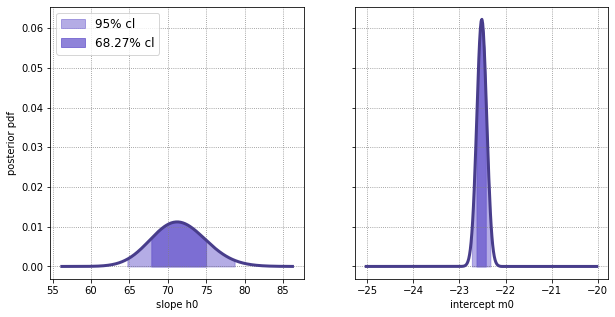

In [264]:
plot_posteriors(pgrid_c, h0g_c, m0g_c)

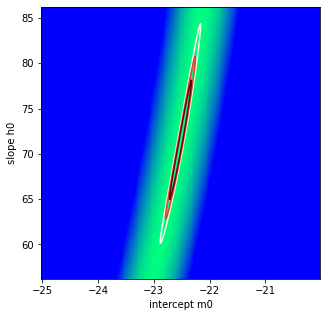

In [265]:
plot_color_map(m0g_c, h0g_c, np.log(pgrid_c), ylabel='slope h0', xlabel='intercept m0',
               ylim=[np.min(h0g_c), np.max(h0g_c)], xlim=[np.min(m0g_c), np.max(m0g_c)], levels = sorted(np.log(levs)), figsize=5) 

Let's now try using different instances of our class with different redshift interval choices and different estimates for $\overline{M_0}$ and $\sigma_{M_0}$ using different subsets of our $\texttt{nedd}$ database. We define this function where $\texttt{isel_a}$ is the range of $z$ values we want to look at, $\texttt{z_intervals_a}$ is the redshift $dz$ slices you want to outlier remove by, $\texttt{params}$ are the initial parameter guesses you want to use, and $\texttt{mr_max}$ is the maximum value of r-band apparent magnitude you want the sample to be constrained to.

In [266]:
def create_instance(isel_a, z_intervals_a, params, mr_max):
  z_a = z[isel_a]
  mr_a = mrbcg[isel_a]
  gr_a = gr[isel_a]

  zn_a, mrn_a, grn_a, sig_m0_a = clean_samples(z_intervals_a, z_a, mr_a, gr_a)

  names_bcgs_a = names_bcgs[mr_bcgs <= mr_max]
  mr_bcgs_a = mr_bcgs[mr_bcgs <= mr_max]

  m0wm_a, m0err_a = compute_weighted(names_bcgs_a, mr_bcgs_a)

  bcg_a = BCGAnalysis_new(params, zn_a, mrn_a, sig_m0_a, m0wm_a, m0err_a)

  h0c_a, m0c_a = bcg_a.param_val(params, zn_a, mrn_a, sig_m0_a)

  params_c_a = [h0c_a, m0c_a]
  pgrid_c_a, h0g_c_a, m0g_c_a = bcg_a.posterior_grid(params_c_a, zn_a, mrn_a, sig_m0_a)

  plot_posteriors(pgrid_c_a, h0g_c_a, m0g_c_a)

  plot_color_map(m0g_c_a, h0g_c_a, np.log(pgrid_c_a), ylabel='slope h0', xlabel='intercept m0',
               ylim=[np.min(h0g_c_a), np.max(h0g_c_a)], xlim=[np.min(m0g_c_a), np.max(m0g_c_a)], levels = sorted(np.log(levs)), figsize=5) 

Let's just try $m_r$ values under 13, with the same redshift interval $0.05\leq z\leq 0.15$ as before. We'll first check to make sure that the sample size of galaxies with $m_r\leq 13$ is greater than $5$ to ensure that we can properly conduct our statistical analysis.

In [267]:
print(np.size(mr_bcgs[mr_bcgs < 13]))

8


So we're good to go, as the number of galaxies is greater than 5. This also implies that taking any sample of $m_r$'s greater than 13 will also be greater than 5, so we're free to use any $\texttt{mr_max}$ value greater than 13 in our analysis.

H0 = 59.99;  M0 = -22.89
max. probability at h0 = 60.04
68.27% credible region for h0: 57.33 - 62.75
95% credible region for h0: 54.93 - 65.56
max. probability at m0 = -22.89
68.27% credible region for m0: -23 - -22.82
95% credible region for m0: -23.09 - -22.72


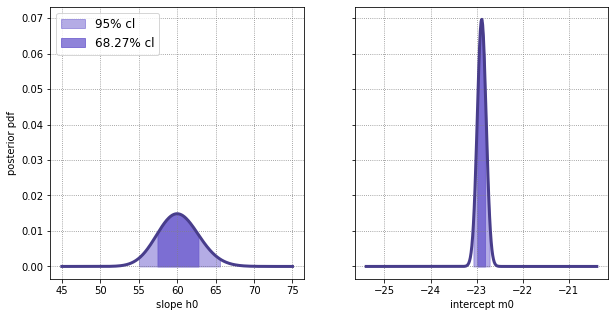

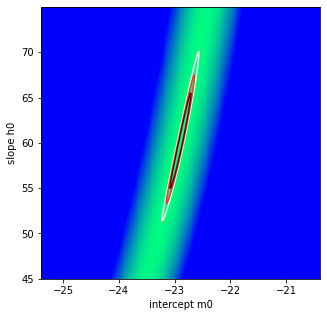

In [268]:
create_instance(isel, z_intervals, params, 13.)

Let's try a redshift interval of $0.075\leq z\leq 0.135$ and all of the $\texttt{mr_bcgs}$ sample from the $\texttt{nedd}$ table to see the effect of redshifts. We won't restrict our $m_r$ value for now.

H0 = 71.13;  M0 = -22.52
max. probability at h0 = 71.18
68.27% credible region for h0: 67.66 - 74.89
95% credible region for h0: 64.45 - 78.6
max. probability at m0 = -22.51
68.27% credible region for m0: -22.65 - -22.43
95% credible region for m0: -22.75 - -22.33


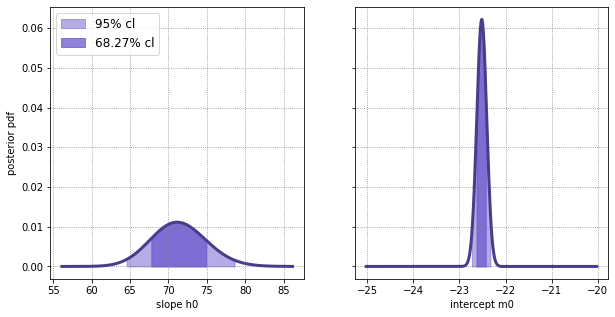

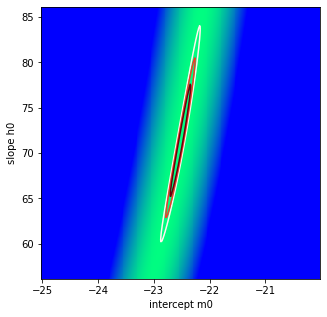

In [269]:
isel_2 = (0.075 <= z) & (z <= 0.135)
z_intervals_2 = np.arange(0.085, 0.135, 0.02)

create_instance(isel_2, z_intervals_2, params, mr_bcgs.max())

So it seems like picking some $z$ values in the middle of our interval doesn't have the greatest effect. Let's see what happens if we pick BCGs that are nearby, i.e. with redshifts $0.05\leq z\leq 0.09$.

H0 = 67.2;  M0 = -22.52
max. probability at h0 = 67.25
68.27% credible region for h0: 63.34 - 71.56
95% credible region for h0: 59.72 - 75.88
max. probability at m0 = -22.51
68.27% credible region for m0: -22.65 - -22.43
95% credible region for m0: -22.75 - -22.33


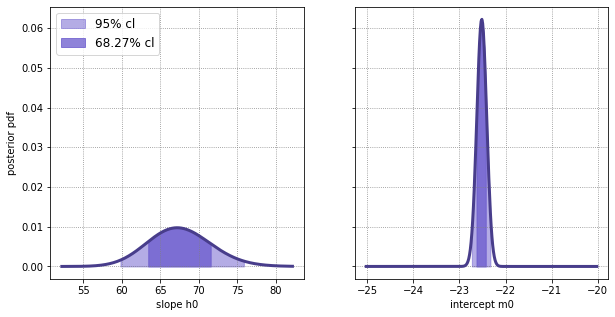

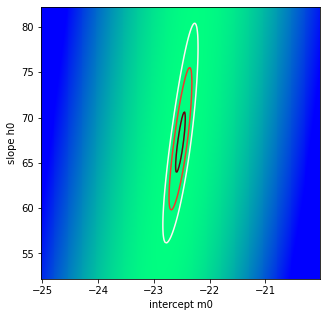

In [270]:
isel_3 = (0.05 <= z) & (z <= 0.09)
z_intervals_3 = np.arange(0.06, 0.08, 0.02)

create_instance(isel_3, z_intervals_3, params, mr_bcgs.max())

So it seems like adjustments to the redshift range changes the $H_0$ value a decent amount, for example, if we change the $z$ range from $0.05\leq z\leq 0.15$ to $0.05\leq z\leq 0.09$, our $H_0$ value drops from $\approx 71$ to $\approx 67$. On the other hand, adjustments to the *range* of the apparent magnitudes $m_r$, specifically picking brighter BCGs like those with $m_r\leq 13$, adjusts our results for $H_0$ substantially (from $H_0\approx 71$ to $H_0\approx 60$). Let's see what happens if we pick $m_r\leq 14$:

H0 = 71.21;  M0 = -22.52
max. probability at h0 = 71.26
68.27% credible region for h0: 67.75 - 74.97
95% credible region for h0: 64.64 - 78.69
max. probability at m0 = -22.51
68.27% credible region for m0: -22.65 - -22.43
95% credible region for m0: -22.75 - -22.33


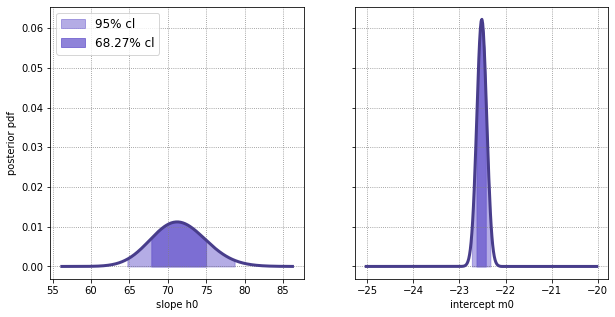

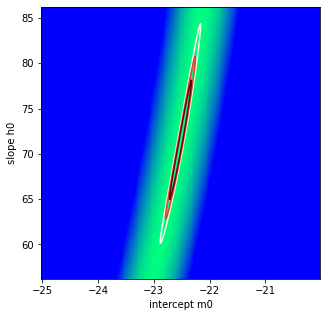

In [271]:
create_instance(isel, z_intervals, params, 14.)

Now $H_0$ shoots back up to $\approx 71$, where it should be around. So the big $21$ km/s/Mpc change must happen for $13\leq m_r\leq 14$. Let's try a few other values of $m_r$ in this range and see what happens:

H0 = 62.92;  M0 = -22.79
max. probability at h0 = 62.97
68.27% credible region for h0: 60.56 - 65.27
95% credible region for h0: 58.45 - 67.68
max. probability at m0 = -22.78
68.27% credible region for m0: -22.88 - -22.73
95% credible region for m0: -22.97 - -22.65


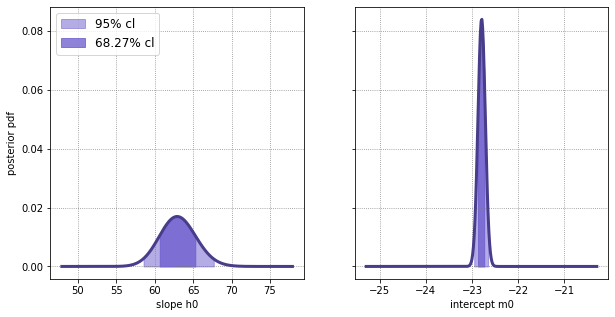

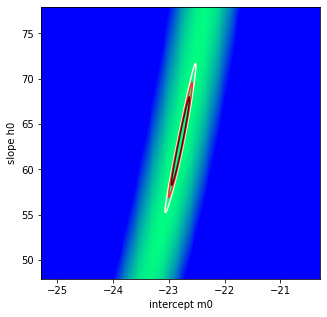

In [272]:
create_instance(isel, z_intervals, params, 13.5)

H0 = 64.09;  M0 = -22.75
max. probability at h0 = 64.14
68.27% credible region for h0: 61.83 - 66.45
95% credible region for h0: 59.73 - 68.76
max. probability at m0 = -22.74
68.27% credible region for m0: -22.84 - -22.69
95% credible region for m0: -22.91 - -22.61


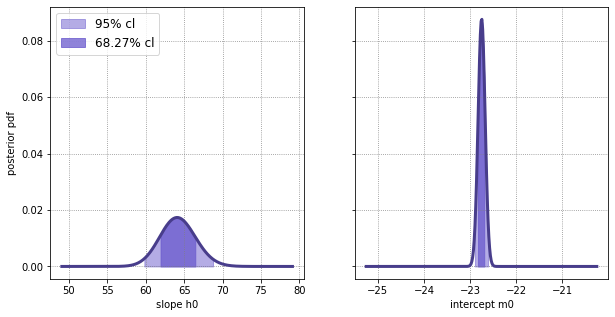

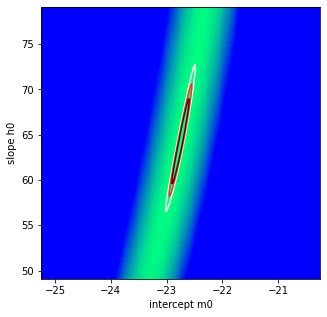

In [273]:
create_instance(isel, z_intervals, params, 13.65)

H0 = 64.09;  M0 = -22.75
max. probability at h0 = 64.14
68.27% credible region for h0: 61.83 - 66.45
95% credible region for h0: 59.73 - 68.76
max. probability at m0 = -22.74
68.27% credible region for m0: -22.84 - -22.69
95% credible region for m0: -22.91 - -22.61


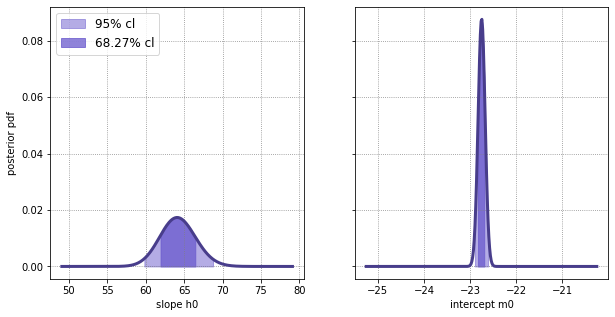

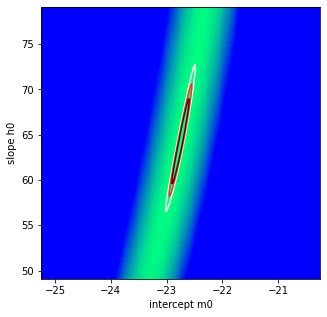

In [274]:
create_instance(isel, z_intervals, params, 13.7)

H0 = 70.6;  M0 = -22.54
max. probability at h0 = 70.65
68.27% credible region for h0: 67.03 - 74.56
95% credible region for h0: 63.72 - 78.47
max. probability at m0 = -22.53
68.27% credible region for m0: -22.67 - -22.43
95% credible region for m0: -22.77 - -22.33


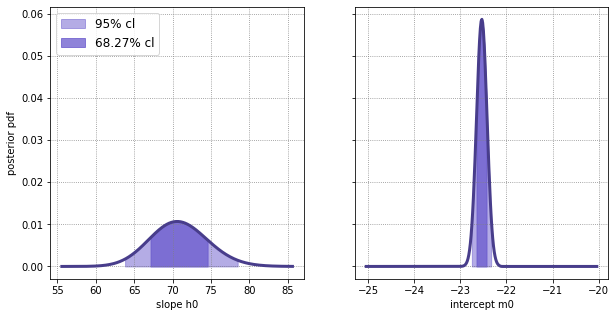

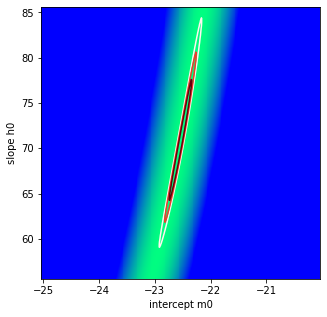

In [275]:
create_instance(isel, z_intervals, params, 13.75)

Thus, we find that in the range $13.5\leq m_r\leq 14$, and in particular $13.65\leq m_r\leq 13.8$, our data is *extremely sensitive* to any adjustments to $m_r$, whereas changes outside this range don't have much of an effect.

With that, feel free to utilize the $\texttt{compute_instance}$ function to look at other instances / combinations of data points. Otherwise, thanks for reading! *Note: This create_instance function has been very funky and doesn't quite work a lot of the time...*

### Code to display SDSS thumbnails of selected BCG galaxies when/if you will want to examine your selected objects visually. 

In [276]:
import sys
from PIL import Image

python_version = sys.version_info[0]

if python_version >= 3:
    import urllib.request
else:
    import cStringIO, urllib
    
def fetch_sdss_image(outfile, RA, DEC, scale=0.2, width=400, height=400):
    """Fetch the image at the given RA, DEC from the SDSS server"""
    url = ("http://skyservice.pha.jhu.edu/DR8/ImgCutout/"
           "getjpeg.aspx?ra=%.8f&dec=%.8f&scale=%.2f&width=%i&height=%i"
           
           % (RA, DEC, scale, width, height))

    if python_version>=3: 
        urllib.request.urlretrieve(url, outfile)
    else:
        fd = cStringIO.StringIO(urllib.urlopen(url).read())
        im = Image.open(fd)
        im.save(outfile)

def sdss_img_collage(objs, ras, decs, nrow, ncol, figsize=(10,10), npix=200, path='img_sdss/', scale=0.2, savefig=None):
    """
    plot image collage of nrow x ncol rows and columns
    
    Parameters:
    -----------
    objs: 64 bit integers, SDSS object IDs of galaxies to display
    ras, decs: float, right ascensions and declinations (in degrees) of the galaxies to display
    
    The fetched image file is stored in the subdirectory specified by path using object ID as a file name. 
    """
    fig, axs = plt.subplots(nrow, ncol, figsize=figsize)
    # Check that PIL is installed for jpg support
    if 'jpg' not in fig.canvas.get_supported_filetypes():
        raise ValueError("PIL required to load SDSS jpeg images")

    for _obj, ra, dec, ax in zip(objs, ras, decs, axs.flatten()):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        outfile = path+str(_obj)+'.jpg'
        fetch_sdss_image(outfile, ra, dec, scale=scale, width=npix, height=npix)
        I = Image.open(outfile)
        ax.imshow(I,origin='lower')
        ax.set_aspect('auto')

    #plt.tight_layout()
    fig.subplots_adjust(hspace=0, wspace=0)
    if savefig != None:
        plt.savefig(savefig,bbox_inches='tight')
    plt.show()


FileNotFoundError: ignored

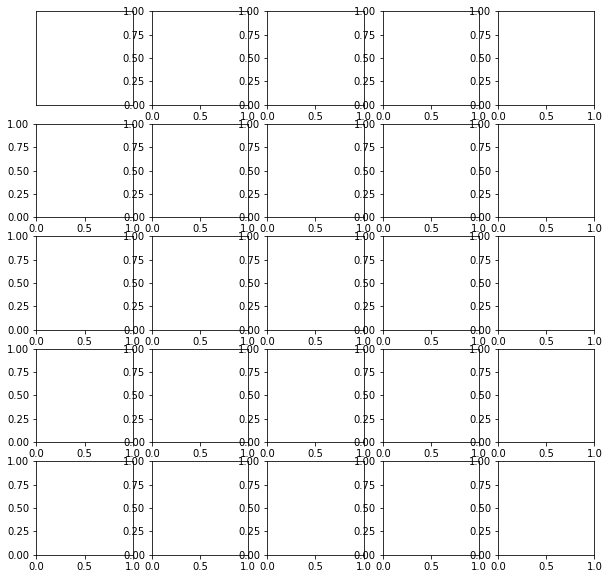

In [277]:
# before running this, make sure that you have a subdirectory img_sdss/ in the directory where this notebook is run
nobj = 25 # number of galaxies to display in a thumbnail collage
nrow = int(np.sqrt(nobj))
ncol = nrow
# select nobj random objects from the sample, fetch their images from SDSS, and display them
isel = np.random.randint(np.size(objid), size=nobj)
oid = objid[isel]
rad, decd = ra[isel], dec[isel]
sdss_img_collage(oid, rad, decd, scale=0.025, npix=1000, nrow=nrow, ncol=ncol)